In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import PyQt5
import mne
import pickle

import numpy as np
import scipy
from scipy.cluster.vq import kmeans as kmeans
import scipy.stats as stats

In [3]:
ttl_info_dict = pickle.load( open( "ttl_info_dict.p", "rb" ) )

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_0_raw.fif...
Isotrak not found
    Range : 142000 ... 350000 =    284.000 ...   700.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


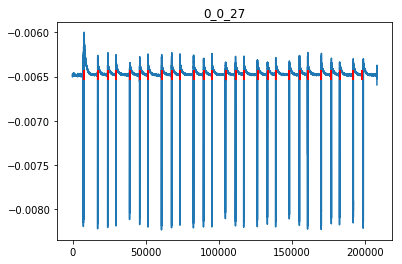

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_1_raw.fif...
Isotrak not found
    Range : 350000 ... 560000 =    700.000 ...  1120.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


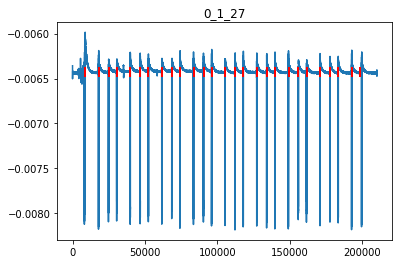

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_2_raw.fif...
Isotrak not found
    Range : 955000 ... 1155000 =   1910.000 ...  2310.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


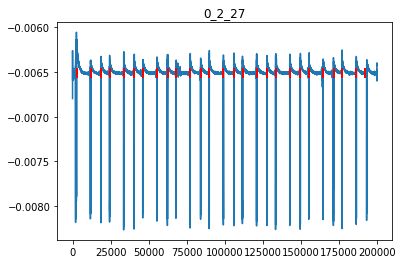

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_1_session_0_raw.fif...
Isotrak not found
    Range : 2305000 ... 2520000 =   4610.000 ...  5040.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected


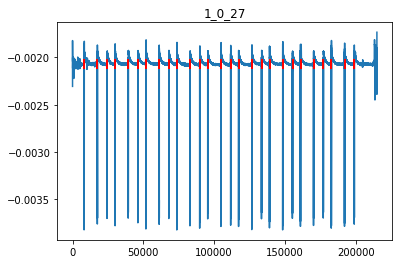

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_1_session_1_raw.fif...
Isotrak not found
    Range : 50000 ... 255000 =    100.000 ...   510.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


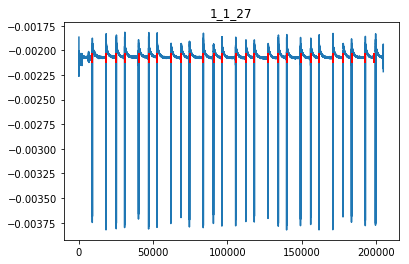

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_3_session_0_raw.fif...
Isotrak not found
    Range : 151000 ... 342000 =    302.000 ...   684.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected


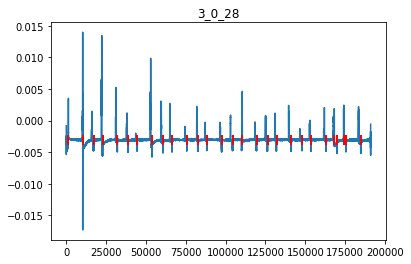

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_3_session_1_raw.fif...
Isotrak not found
    Range : 153000 ... 363000 =    306.000 ...   726.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected


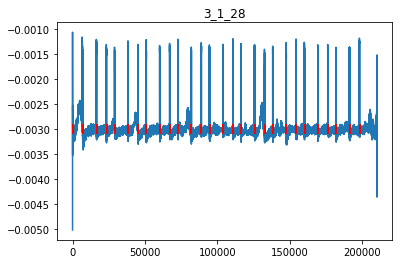

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_3_session_2_raw.fif...
Isotrak not found
    Range : 40000 ... 250000 =     80.000 ...   500.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


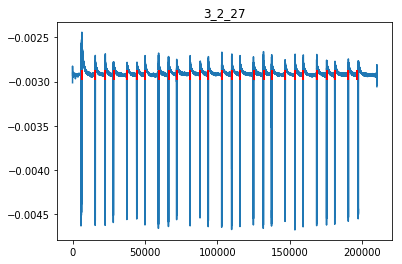

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_4_session_0_raw.fif...
Isotrak not found
    Range : 510000 ... 730000 =   1020.000 ...  1460.000 secs
Ready.
Setting up band-stop filter
Filter length of 3301 samples (6.602 sec) selected
A
27


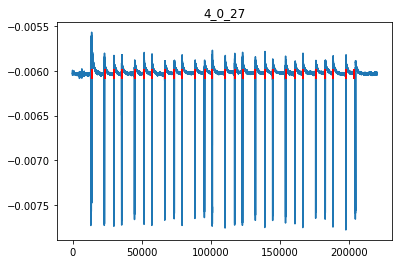

In [4]:
for ii in ttl_info_dict: 
    filename = 'data/sub_'+str(ttl_info_dict[ii]['subject'])+'_session_'+str(ttl_info_dict[ii]['session'])+'_raw.fif'
    raw = mne.io.read_raw_fif(filename, preload=False)
    
    ttl_ch = ttl_info_dict[ii]['ttl']
    
    raw_data = raw.get_data(picks=[ttl_ch] )
    raw_data = raw_data[0]
    raw_data = mne.filter.notch_filter(raw_data, raw.info['sfreq'], [50,100,150,200], notch_widths=2)
    
    
    idx_ttl = np.where( stats.zscore(np.abs(np.diff(raw_data))) > 5 )[0]
    idx_ttl_2 = np.where(np.diff(idx_ttl)>1000)[0]
    
    final_idx = np.copy(idx_ttl[idx_ttl_2])
    
    if final_idx.size == 26:
        print('A')
        final_idx = np.append(final_idx , final_idx[-1]+np.min(np.diff(final_idx)))
        print(final_idx.size)
    
    
    ttl_info_dict[ii]['markers'] = final_idx
    plt.plot( raw_data )
    plt.plot(   final_idx, np.ones(final_idx.size)*np.mean(raw_data)   , 'r|', markeredgewidth=2, markersize=10)
    plt.title( str(ttl_info_dict[ii]['subject']) +'_'+ str(ttl_info_dict[ii]['session'])+'_'+str(final_idx.size) )
    
    plt.show()

In [5]:
for ii in ttl_info_dict: 

    filename = 'data/sub_'+str(ttl_info_dict[ii]['subject'])+'_session_'+str(ttl_info_dict[ii]['session'])+'_raw.fif'
    raw = mne.io.read_raw_fif(filename, preload=False)

    tmp_hpc_channels_idx = []
    tmp_hpc_channels_name = []
    for cc in range(len(raw.info['ch_names'])):
        if raw.info['ch_names'][cc] in ["C1","C2","B1","B2","C'1","C'2","B'1","B'2"]:
            tmp_hpc_channels_idx.append(cc)
            tmp_hpc_channels_name.append(raw.info['ch_names'][cc])
            
            
    ttl_info_dict[ii]['hpc_channels_idx'] = tmp_hpc_channels_idx
    ttl_info_dict[ii]['hpc_channels_name'] = tmp_hpc_channels_name

Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_0_raw.fif...
Isotrak not found
    Range : 142000 ... 350000 =    284.000 ...   700.000 secs
Ready.
Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_1_raw.fif...
Isotrak not found
    Range : 350000 ... 560000 =    700.000 ...  1120.000 secs
Ready.
Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_0_session_2_raw.fif...
Isotrak not found
    Range : 955000 ... 1155000 =   1910.000 ...  2310.000 secs
Ready.
Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_1_session_0_raw.fif...
Isotrak not found
    Range : 2305000 ... 2520000 =   4610.000 ...  5040.000 secs
Ready.
Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_1_session_1_raw.fif...
Isotrak not found
    Range : 50000 ... 255000 =    100.000 ...   510.000 secs
Ready.
Opening raw data file /Users/diogo/Desktop/Normaliser_2019/data/sub_3_session_0_raw.fif...
Isotrak not found

In [6]:
pickle.dump( ttl_info_dict, open( "ttl_info_dict.p", "wb" ) )